In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly as px
import altair as alt
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00


In [9]:
#Load Dataset
df = pd.read_csv("/content/osn.csv")

#Display Dataset
df

,Unnamed: 0,Nama Peserta,Gender,Sekolah,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Prize Tambahan,Tahun
0,0,Gangsar Lintas Damai,L,MA Amanatul Ummah,Jawa Timur,Kota Surabaya,Biologi,SMA,SMA,11.0,Partisipan,NaN,2016
1,1,Muhammad Khairul Ihsan,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Partisipan,NaN,2021
2,2,Farhannur,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Emas,NaN,2022
3,3,Muhammad Fathoni,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Fisika,SMA,SMA,11.0,Partisipan,NaN,2022
4,4,Rahmat MI,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Kimia,SMA,SMA,11.0,Partisipan,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,19322,Fitri Julia Simamora,P,SMPN 4 Doloksanggul,Sumatera Utara,Kab. Humbang Hasundutan,Matematika,SMP,SMP,7.0,Partisipan,NaN,2024
19323,19323,Jonathan Kevin Aruan,L,SMPN 6 Sentajo,Riau,Kab. Kuantan Singingi,IPS,SMP,SMP,NaN,Partisipan,NaN,2016
19324,19324,Mely Winda Sihite,P,SMPN 4 Doloksanggul,Sumatera Utara,Kab. Humbang Hasundutan,Matematika,SMP,SMP,7.0,Partisipan,NaN,2024
19325,19325,Jelita Fazira,P,SMPN 4 Pantai Labu Satu Atap,Sumatera Utara,Kab. Deli Serdang,IPS,SMP,SMP,NaN,Partisipan,NaN,2021


In [10]:
#Checking Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       19327 non-null  int64  
 1   Nama Peserta     19327 non-null  object 
 2   Gender           19327 non-null  object 
 3   Sekolah          19327 non-null  object 
 4   Provinsi         19327 non-null  object 
 5   Kab/Kota         19327 non-null  object 
 6   Bidang           19327 non-null  object 
 7   Jenjang Lomba    19327 non-null  object 
 8   Jenjang Sekolah  19327 non-null  object 
 9   Kelas            14852 non-null  float64
 10  Medali           19327 non-null  object 
 11  Prize Tambahan   221 non-null    object 
 12  Tahun            19327 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


In [ ]:
#Checking Data Statistic
df.describe()

,Unnamed: 0,Kelas,Tahun
count,19327.000000,14852.000000,19327.000000
mean,9663.000000,10.187719,2016.919180
std,5579.368662,1.218686,4.570646
min,0.000000,7.000000,2009.000000
25%,4831.500000,10.000000,2013.000000
50%,9663.000000,11.000000,2017.000000
75%,14494.500000,11.000000,2021.000000
max,19326.000000,11.000000,2024.000000


In [11]:
from collections import defaultdict
sekolah_kab_kota_dict = defaultdict(set)
for _, row in df.iterrows():
    sekolah_kab_kota_dict[row['Sekolah']].add(row['Kab/Kota'])
new_sekolah_kab_kota_dict = {
    sekolah: list(kab_kota)
    for sekolah, kab_kota in sekolah_kab_kota_dict.items()
    if len(kab_kota) > 1
}
new_sekolah_kab_kota_dict

{}

In [12]:
def replace(school, correct_place):
    df.loc[df['Sekolah'] == school, 'Kab/Kota'] = correct_place

In [13]:
from collections import defaultdict
import math
peserta_dict = defaultdict(list)

for _, row in df.iterrows():
   kelas = row['Kelas'] if not math.isnan(row['Kelas']) else 0
   tahun_kelas = row['Tahun'] - kelas
   if tahun_kelas not in peserta_dict[row['Nama Peserta']]:
        peserta_dict[row['Nama Peserta']].append(tahun_kelas)
new_peserta_dict = {
    peserta: tahun_list
    for peserta, tahun_list in peserta_dict.items()
    if len(tahun_list) > 1
}
new_peserta_dict

{}

In [14]:
#Filtering data for the 'SMA' competition level
df_sma = df.loc[df['Jenjang Lomba'] == 'SMA']
df_sma

,Unnamed: 0,Nama Peserta,Gender,Sekolah,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Prize Tambahan,Tahun
0,0,Gangsar Lintas Damai,L,MA Amanatul Ummah,Jawa Timur,Kota Surabaya,Biologi,SMA,SMA,11.0,Partisipan,NaN,2016
1,1,Muhammad Khairul Ihsan,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Partisipan,NaN,2021
2,2,Farhannur,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Emas,NaN,2022
3,3,Muhammad Fathoni,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Fisika,SMA,SMA,11.0,Partisipan,NaN,2022
4,4,Rahmat MI,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Kimia,SMA,SMA,11.0,Partisipan,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19018,19018,Muhammad Al-Kahfi,L,SMPN 5 Padang Panjang,Sumatera Barat,Kota Padang Panjang,Matematika,SMA,SMP,9.0,Partisipan,NaN,2011
19196,19196,Muhammad Achir Suci Ramadhan,L,SMPN 9 Kendari,Sulawesi Tenggara,Kota Kendari,Matematika,SMA,SMP,9.0,Partisipan,NaN,2014
19232,19232,Galih Pradipto Wisnujati,L,SMPN 9 Yogyakarta,DI Yogyakarta,Kota Yogyakarta,Matematika,SMA,SMP,9.0,Partisipan,NaN,2011
19246,19246,Zizou Athoillah Putra Gunawan,L,MAN Insan Cendekia Kota Batam,Kepulauan Riau,Kota Batam,Astronomi,SMA,SMA,10.0,Emas,NaN,2024


In [15]:
df_smp = df.loc[df['Jenjang Lomba'] == 'SMP']
df_smp

,Unnamed: 0,Nama Peserta,Gender,Sekolah,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Prize Tambahan,Tahun
13,13,Nafla,P,MTs Jeumala Amal,Aceh,Kab. Pidie Jaya,Matematika,SMP,SMP,NaN,Partisipan,NaN,2022
27,27,Putri Akmalia,P,MTsN 1 Buleleng,Bali,Kab. Buleleng,IPS,SMP,SMP,NaN,Partisipan,NaN,2023
28,28,Putri Hidayathi,P,MTsN 2 Buleleng,Bali,Kab. Buleleng,IPA,SMP,SMP,NaN,Partisipan,NaN,2020
29,29,Yumna Haura Indriani,P,MTsN 2 Buleleng,Bali,Kab. Buleleng,IPA,SMP,SMP,NaN,Harapan,NaN,2021
30,30,Zahra Afifah,P,MTsN 2 Buleleng,Bali,Kab. Buleleng,IPA,SMP,SMP,NaN,Partisipan,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,19322,Fitri Julia Simamora,P,SMPN 4 Doloksanggul,Sumatera Utara,Kab. Humbang Hasundutan,Matematika,SMP,SMP,7.0,Partisipan,NaN,2024
19323,19323,Jonathan Kevin Aruan,L,SMPN 6 Sentajo,Riau,Kab. Kuantan Singingi,IPS,SMP,SMP,NaN,Partisipan,NaN,2016
19324,19324,Mely Winda Sihite,P,SMPN 4 Doloksanggul,Sumatera Utara,Kab. Humbang Hasundutan,Matematika,SMP,SMP,7.0,Partisipan,NaN,2024
19325,19325,Jelita Fazira,P,SMPN 4 Pantai Labu Satu Atap,Sumatera Utara,Kab. Deli Serdang,IPS,SMP,SMP,NaN,Partisipan,NaN,2021


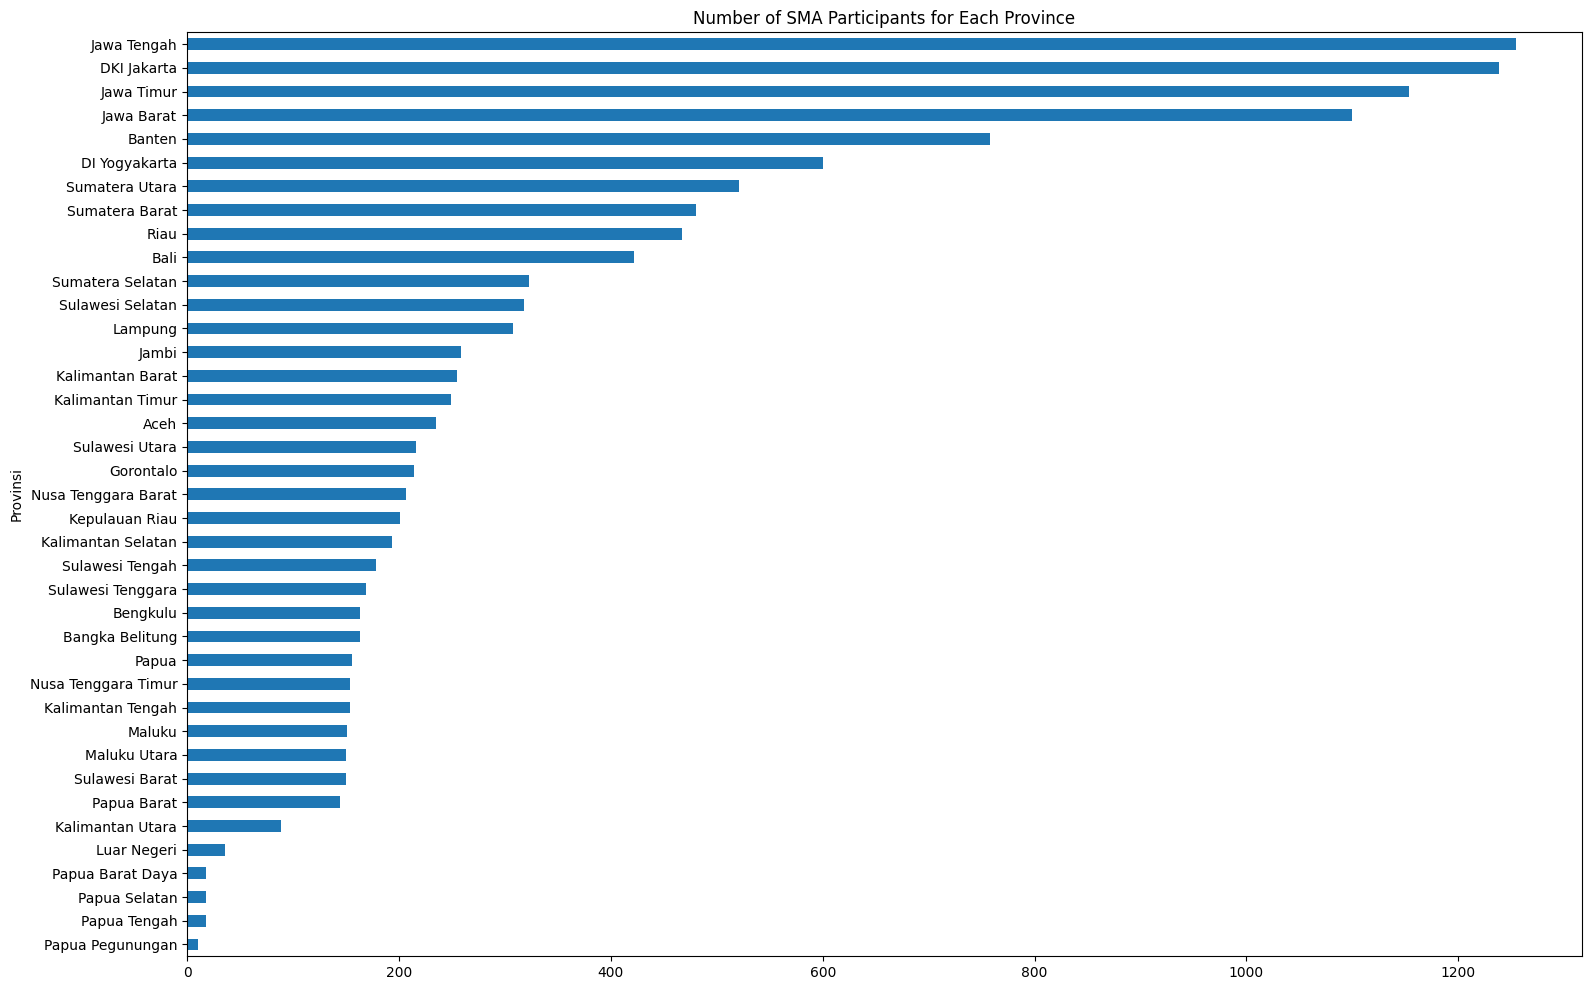

In [16]:
#Figure Number of SMA Participants for Each Province
plt.figure(figsize=(18, 12))
plt.title('Number of SMA Participants for Each Province')
df_sma['Provinsi'].value_counts().sort_values().plot.barh()
plt.show()

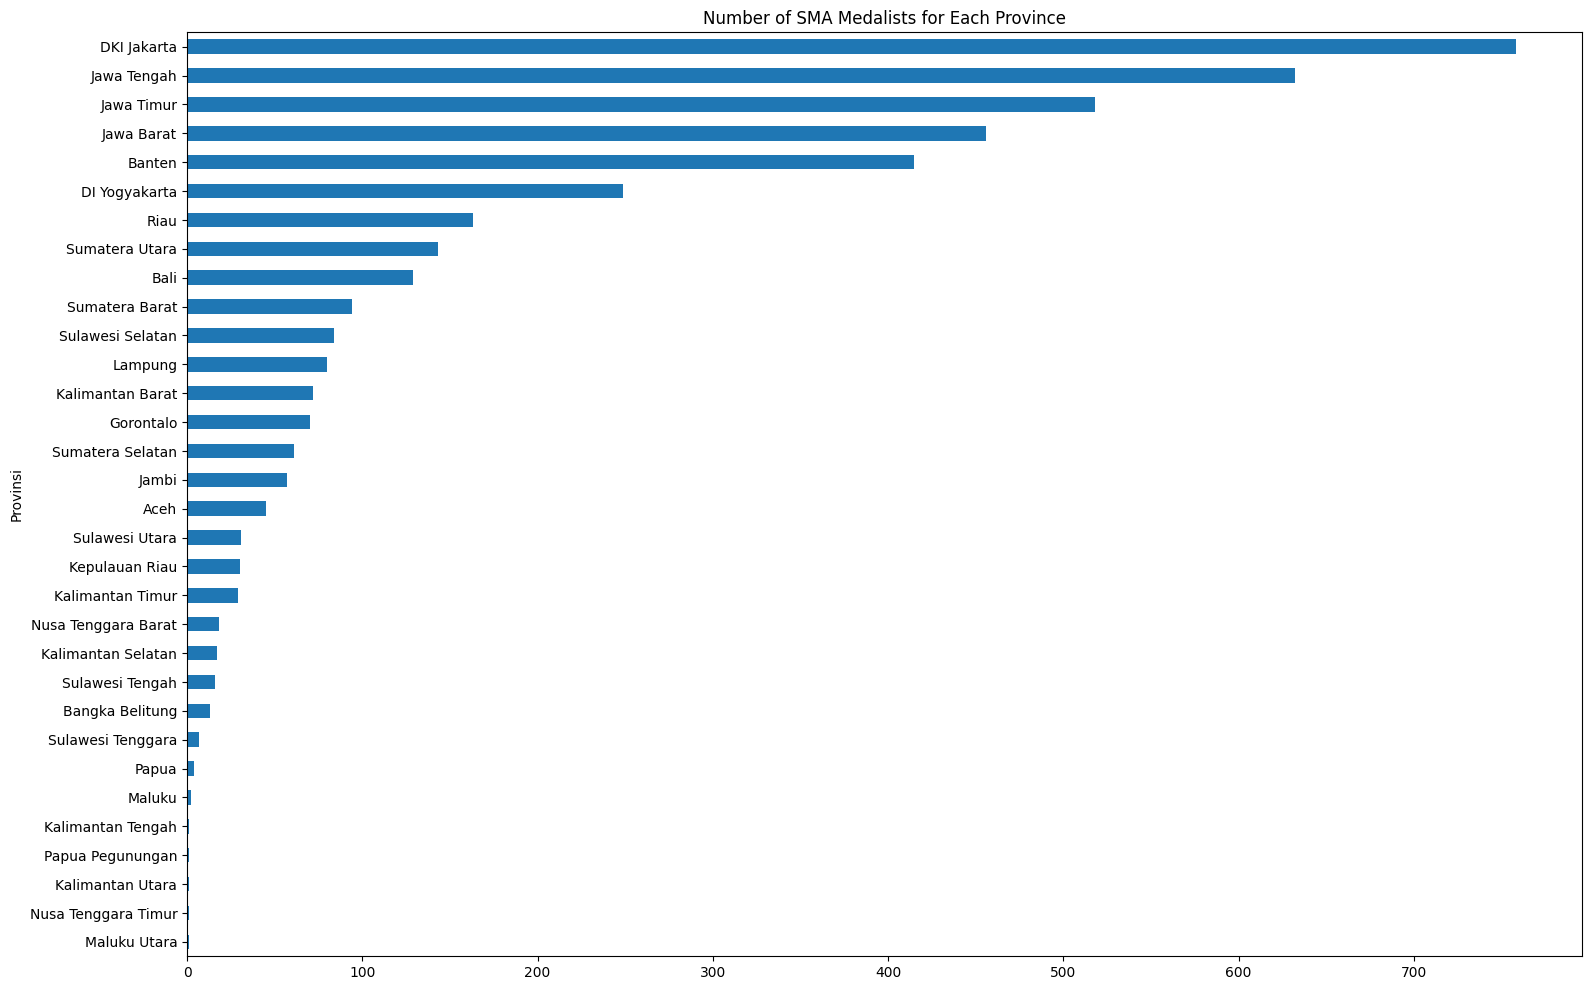

In [17]:
#Figure Number of SMA Medalists for Each Province
plt.figure(figsize=(18, 12))
plt.title('Number of SMA Medalists for Each Province')
df_sma.loc[df['Medali'] != 'Partisipan']['Provinsi'].value_counts().sort_values().plot.barh()
plt.show()

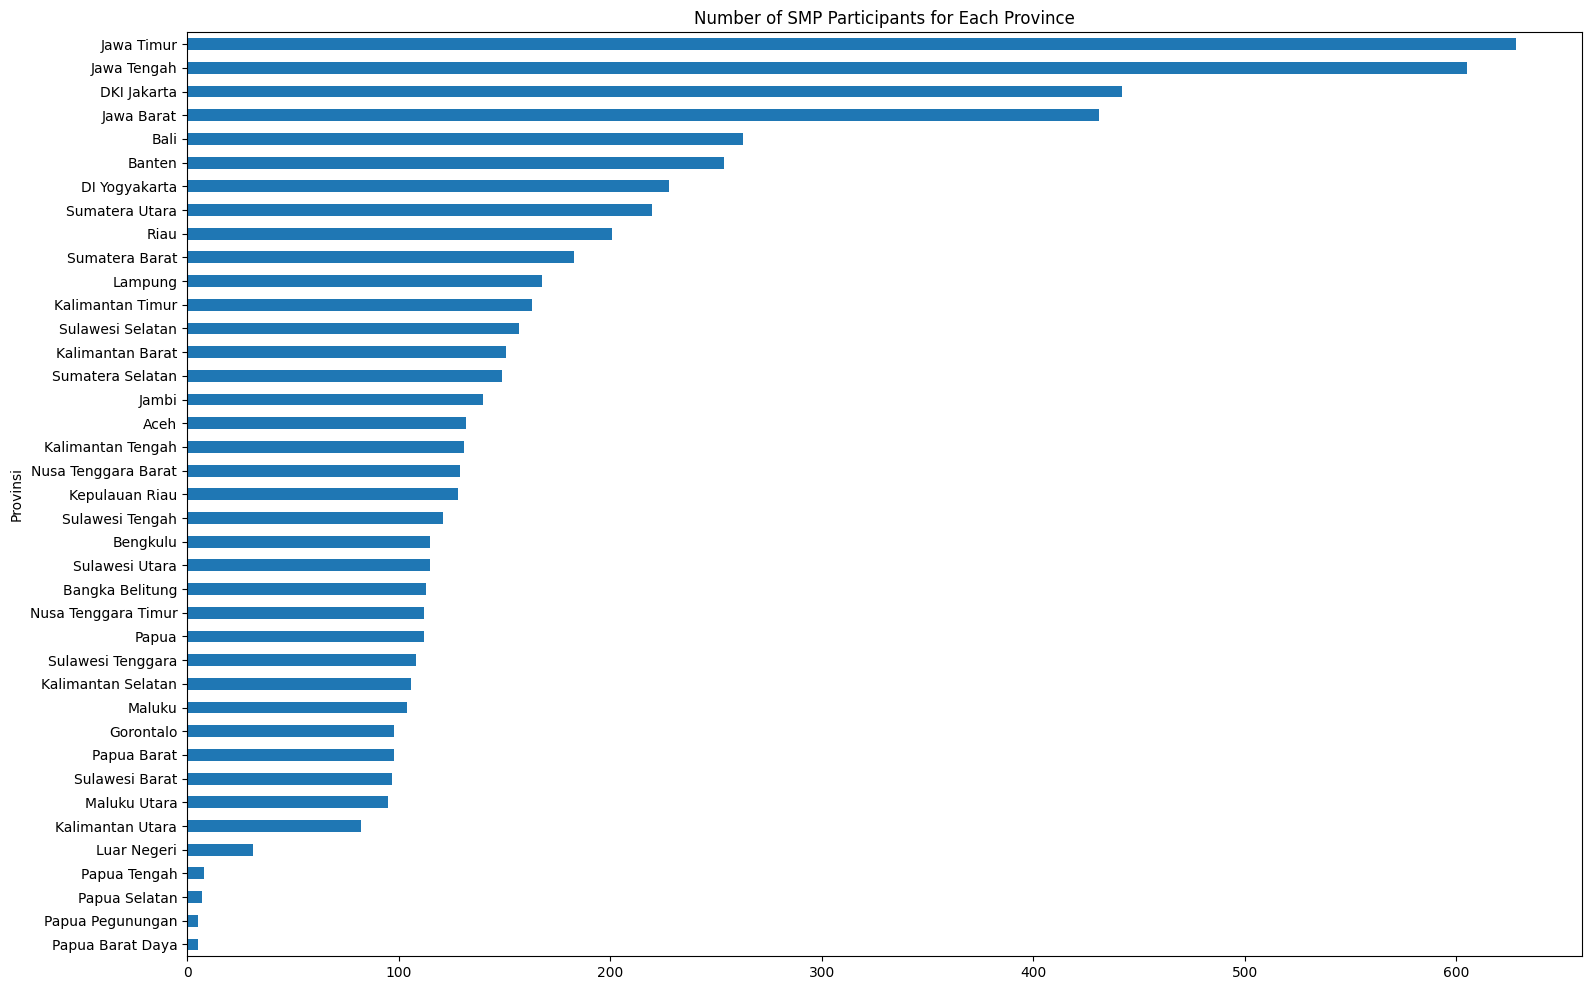

In [18]:
#Figure Number of SMP Participants for Each Province
plt.figure(figsize=(18, 12))
plt.title('Number of SMP Participants for Each Province')
df_smp['Provinsi'].value_counts().sort_values().plot.barh()
plt.show()

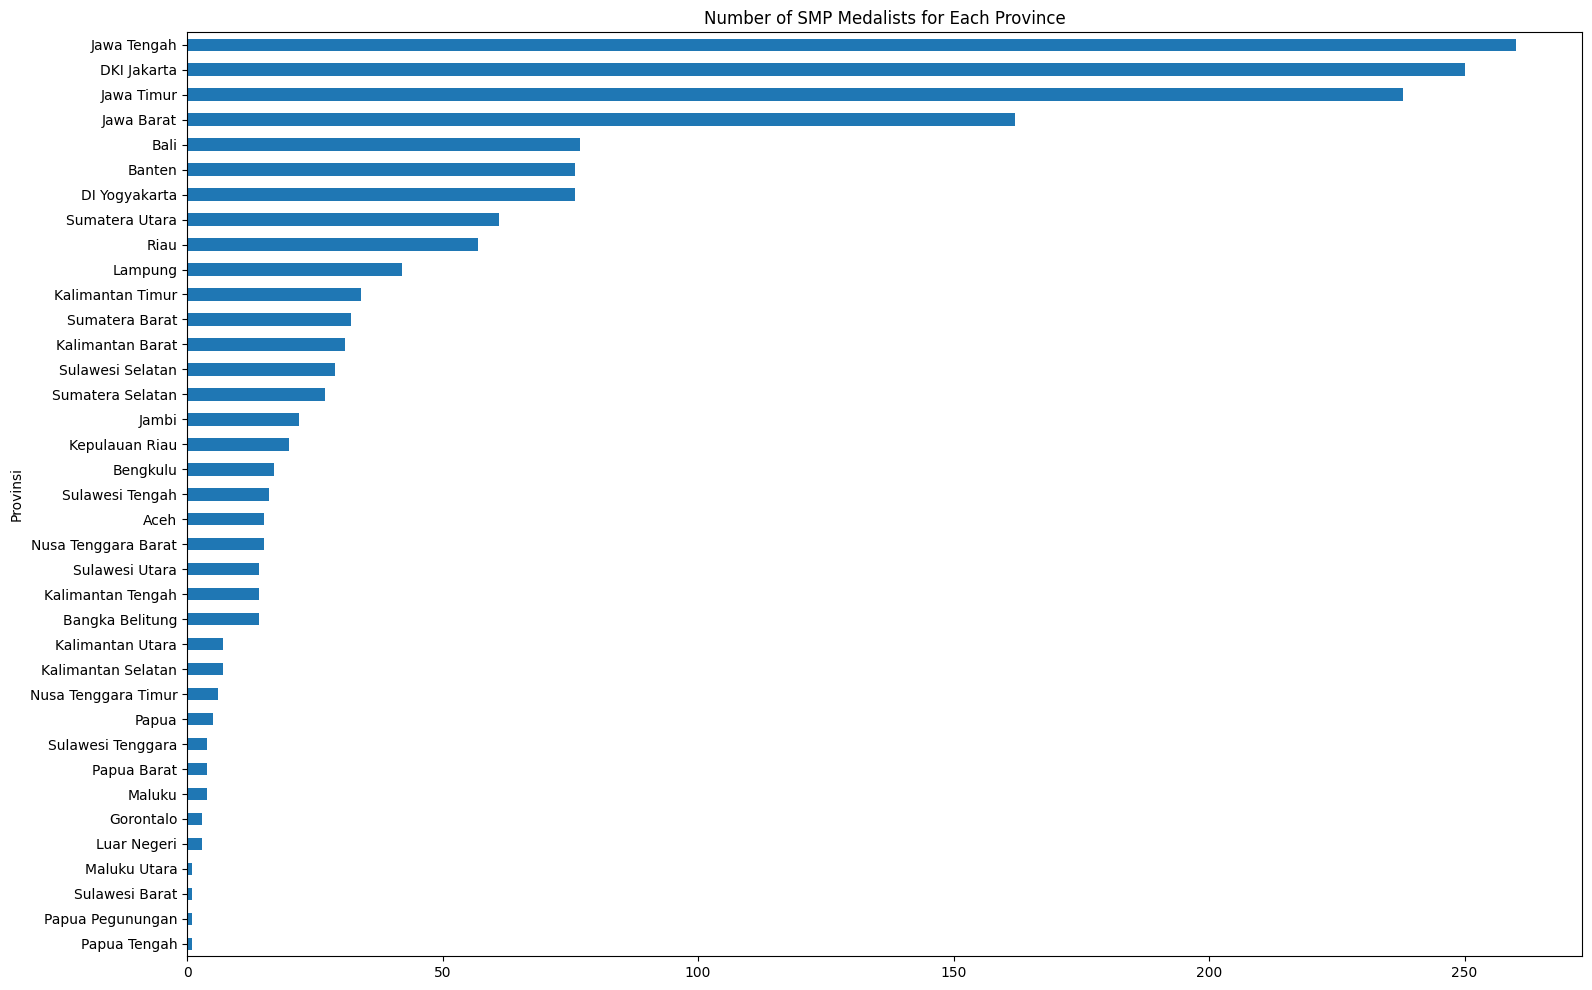

In [19]:
#Figure Number of SMP Medalists for Each Province
plt.figure(figsize=(18, 12))
plt.title('Number of SMP Medalists for Each Province')
df_smp.loc[df['Medali'] != 'Partisipan']['Provinsi'].value_counts().sort_values().plot.barh()
plt.show()

In [23]:
#Filtering participant and medal each province at sma-part_series
sma_part_series = df_sma['Provinsi'].value_counts().sort_index()
sma_medal_series = (
    df_sma.loc[df_sma['Medali'] != 'Partisipan', 'Provinsi']
    .value_counts()
    .reindex(sma_part_series.index, fill_value=0)
    .sort_index()
)

In [22]:
#Filtering participant and medal each province at smp_part_series
smp_part_series = df_smp['Provinsi'].value_counts().sort_index()
smp_medal_series = (
    df_smp.loc[df_smp['Medali'] != 'Partisipan', 'Provinsi']
    .value_counts()
    .reindex(smp_part_series.index, fill_value=0)
    .sort_index()
)

In [29]:
#Create dataframe part series, medal series each province
def create_dataframe(part_series, medal_series):
    df = pd.DataFrame({
        'Provinsi': part_series.index,
        'Partisipan': part_series.values,
        'Medali': medal_series.values,
        'Non-medali': part_series.values - medal_series.values
    })
    return df.set_index('Provinsi').sort_values(['Medali', 'Partisipan'])

df_sma_mvp = create_dataframe(sma_part_series, sma_medal_series)
df_smp_mvp = create_dataframe(smp_part_series, smp_medal_series)

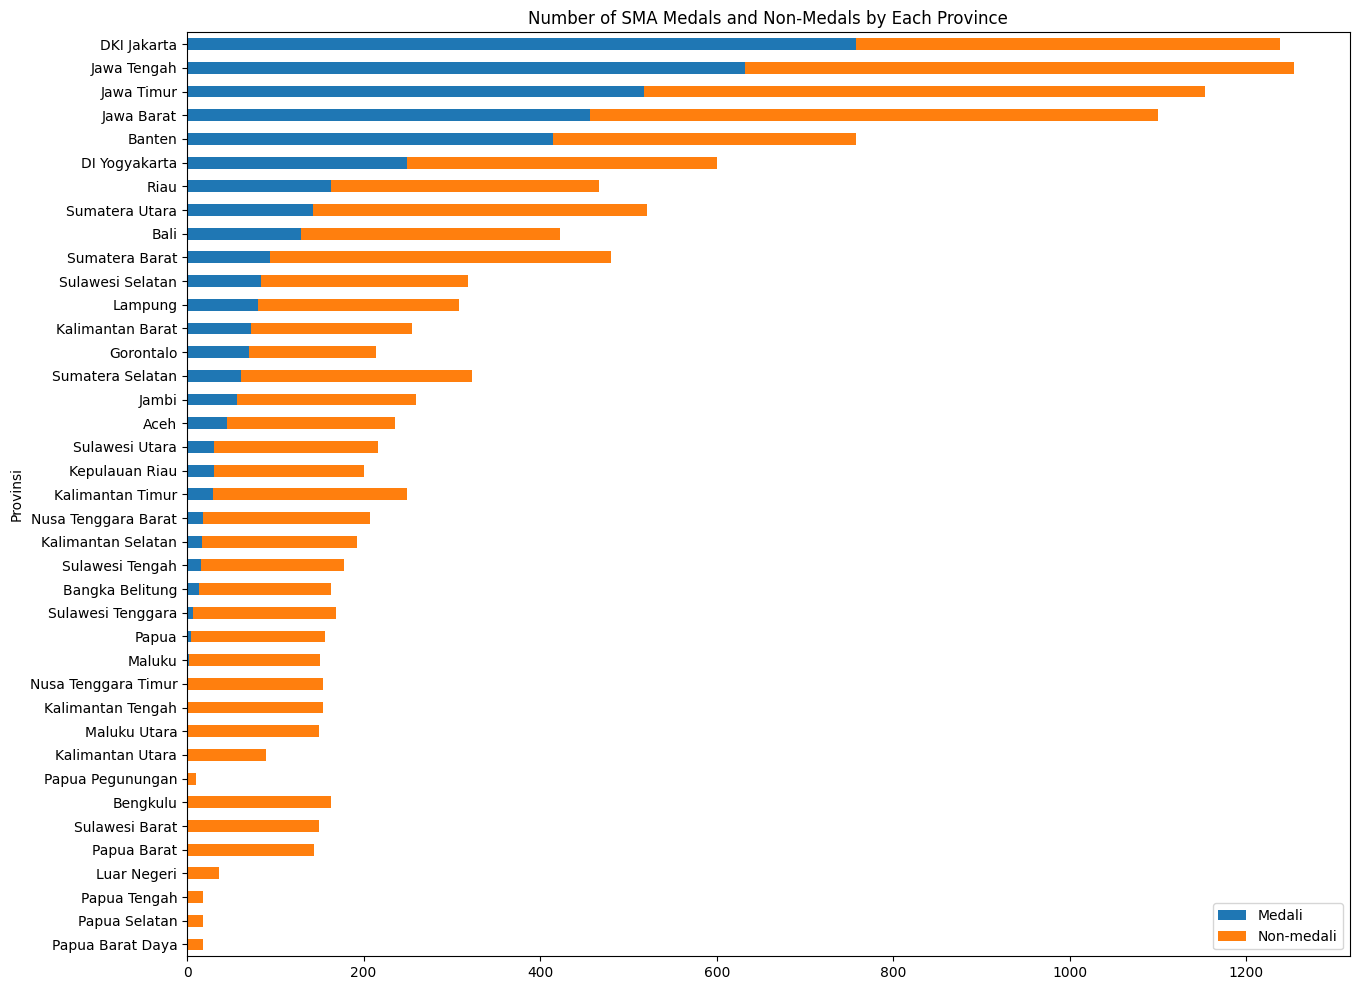

In [30]:
#Figure Number of SMA Medals and Non-Medals by Each Province
df_sma_mvp[['Medali', 'Non-medali']].plot.barh(stacked=True, figsize=(15, 12))
plt.title('Number of SMA Medals and Non-Medals by Each Province')
plt.show()

In [26]:
df_sma_mvp

,Partisipan,Medali,Non-medali
Provinsi,,,
Papua Barat Daya,18,0,18
Papua Selatan,18,0,18
Papua Tengah,18,0,18
Luar Negeri,36,0,36
Papua Barat,144,0,144
Sulawesi Barat,150,0,150
Bengkulu,163,0,163
Papua Pegunungan,10,1,9
Kalimantan Utara,89,1,88


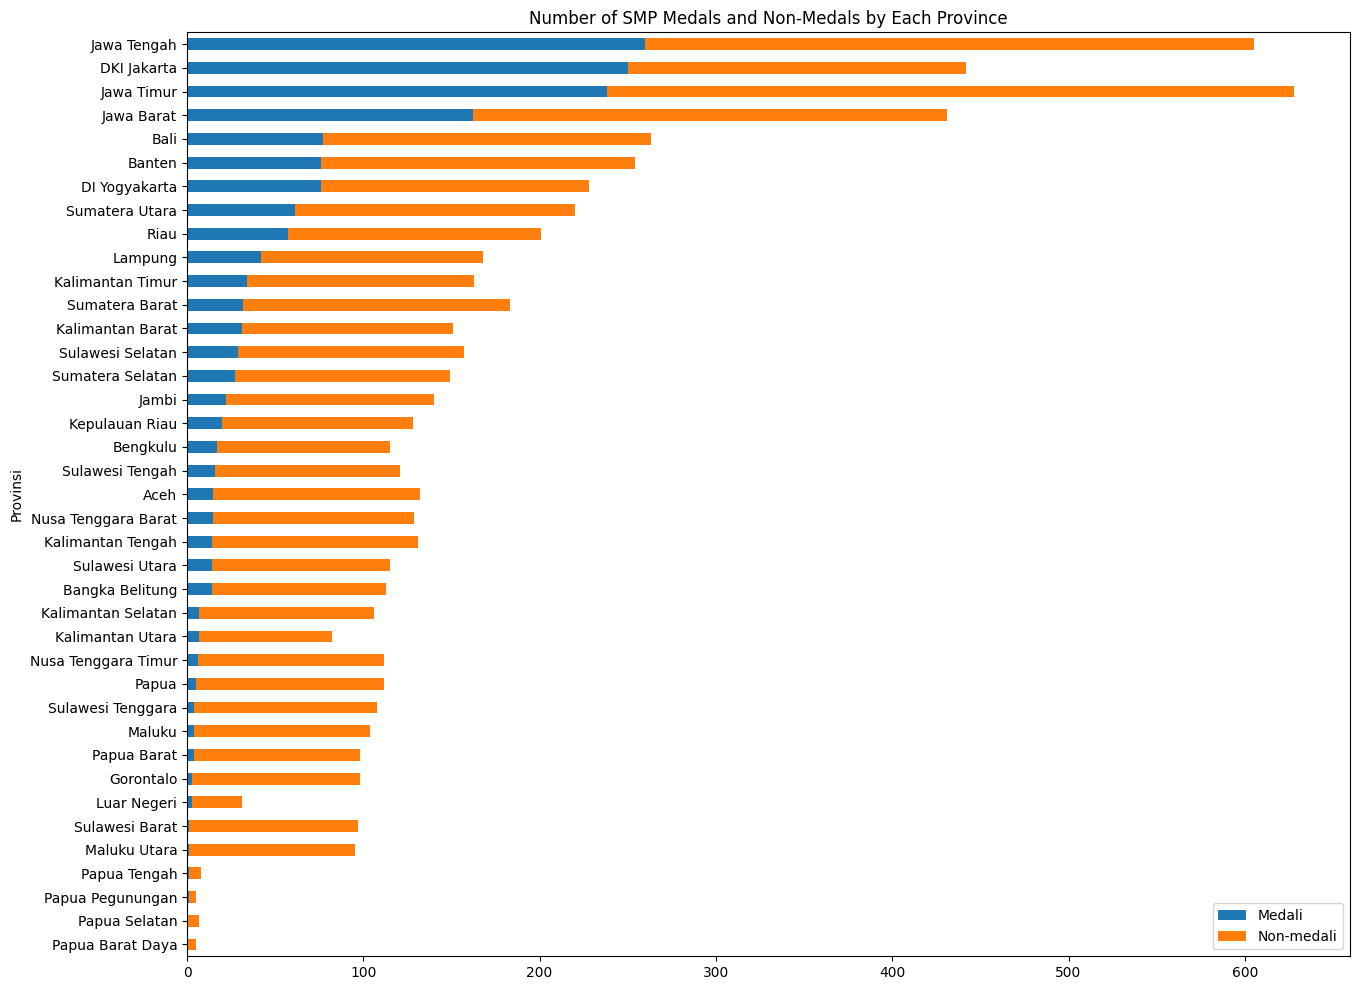

In [31]:
#Figure Number of SMP Medals and Non-Medals by Each Province
df_smp_mvp[['Medali', 'Non-medali']].plot.barh(stacked=True, figsize=(15, 12))
plt.title('Number of SMP Medals and Non-Medals by Each Province')
plt.show()

In [28]:
df_smp_mvp

,Partisipan,Medali,Non-medali
Provinsi,,,
Papua Barat Daya,5,0,5
Papua Selatan,7,0,7
Papua Pegunungan,5,1,4
Papua Tengah,8,1,7
Maluku Utara,95,1,94
Sulawesi Barat,97,1,96
Luar Negeri,31,3,28
Gorontalo,98,3,95
Papua Barat,98,4,94


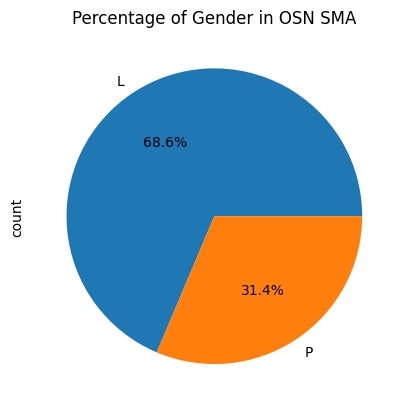

In [32]:
#Figure Gender Participant in OSN SMA
plt.title('Percentage of Gender in OSN SMA')
df_sma['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

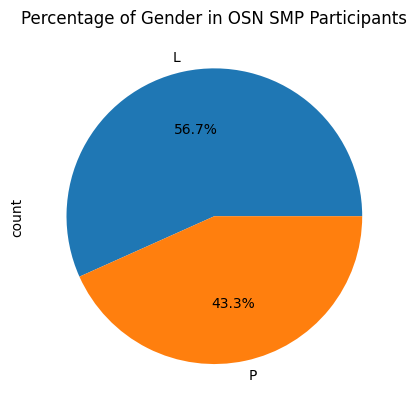

In [33]:
#Figure Gender Participant in OSN SMP
plt.title('Percentage of Gender in OSN SMP Participants')
df_smp['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

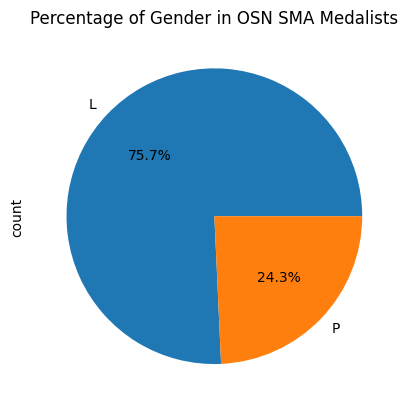

In [34]:
#Figure Gender medalist in OSN SMA
plt.title('Percentage of Gender in OSN SMA Medalists')
df_sma.loc[df['Medali'] != 'Partisipan']['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

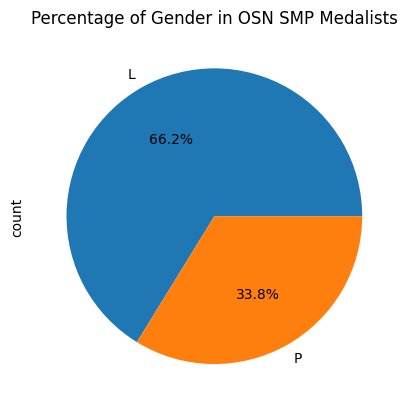

In [35]:
# @title
#Figure Gender medalist in OSN SMP
plt.title('Percentage of Gender in OSN SMP Medalists')
df_smp.loc[df['Medali'] != 'Partisipan']['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()